In [1]:
# import packages
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# data load
df = pd.read_csv("Sustainability Hackathon Dataset.csv")
df.rename(columns = {"GDP per capita (current US$) - NY.GDP.PCAP.CD":"GDP per capita"}, inplace = True)
df.shape

(3287, 54)

In [3]:
# check missing values
df['GDP per capita'].isnull().values.any()

True

In [4]:
# % of missing.
import numpy as np
for col in df.columns:
    if col == 'GDP per capita':                
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

GDP per capita - 1%


In [5]:
# replace missing values with the median because of GDP columns is numeric
med = df['GDP per capita'].median()
print(med)
df['GDP per capita'] = df['GDP per capita'].fillna(med)

4335.7090069999995


In [6]:
# check missing values
df['GDP per capita'].isnull().values.any()

False

In [7]:
# filter data upon 4 countries
countries_to_keep = ['United States', 'China', 'India', 'Ethiopia']
columns = ['Country Name', 'Year', 'GDP per capita']
df_gdp = df[df['Country Name'].isin(countries_to_keep)][columns]
gdp_col = 'GDP per capita'
df_gdp.head

<bound method NDFrame.head of        Country Name  Year  GDP per capita
589           China  2000      959.372484
590           China  2001     1053.108243
591           China  2002     1148.508290
592           China  2003     1288.643252
593           China  2004     1508.668098
...             ...   ...             ...
3130  United States  2014    55049.988330
3131  United States  2015    56863.371500
3132  United States  2016    58021.400500
3133  United States  2017    60109.655730
3134  United States  2018    63064.418410

[76 rows x 3 columns]>

<AxesSubplot:>

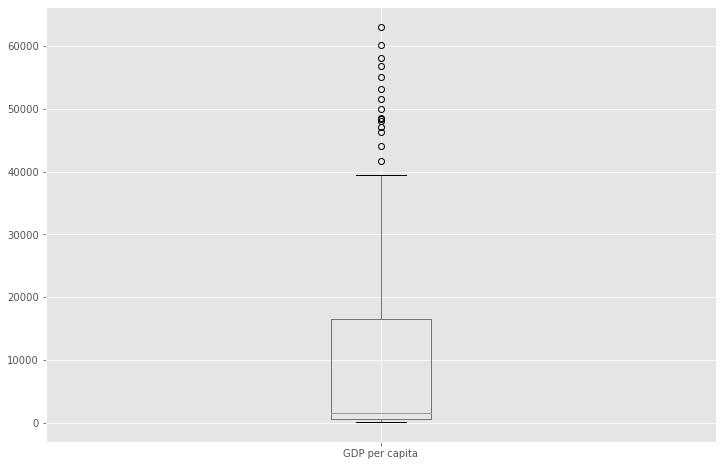

In [8]:
# box plot.
df_gdp.boxplot(column=[gdp_col])

<AxesSubplot:xlabel='Country Name', ylabel='GDP per capita'>

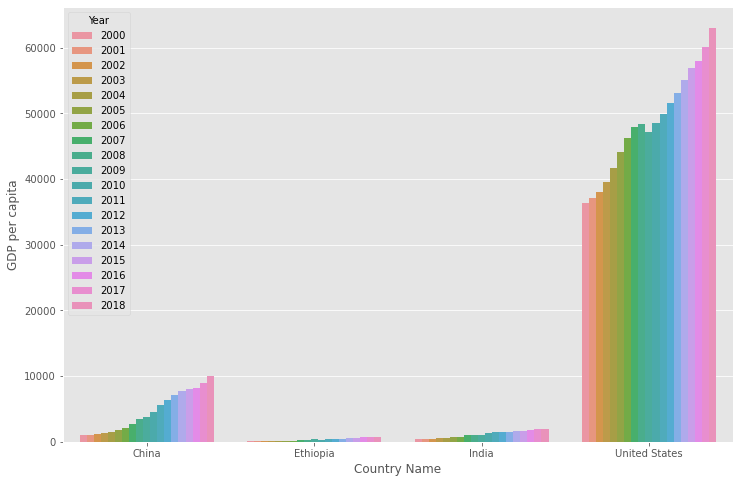

In [9]:
# bar chart
sns.barplot(x='Country Name', y= 'GDP per capita', data=df_gdp, hue='Year')

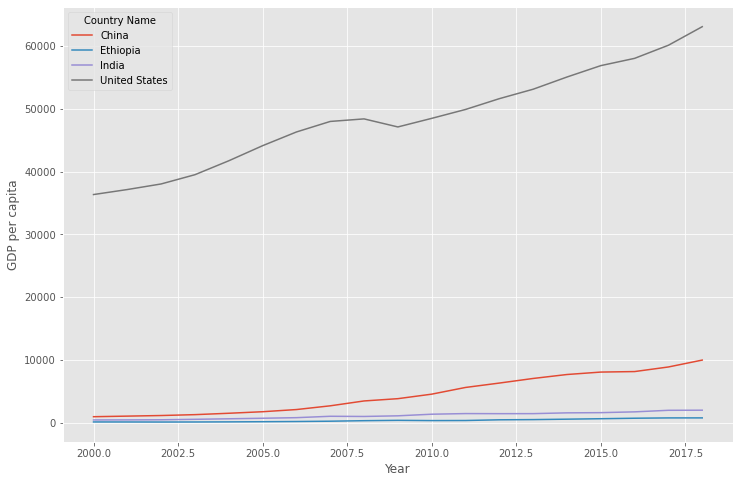

In [10]:
sns.lineplot(x = "Year", y='GDP per capita', hue='Country Name', data = df_gdp)
plt.show()